In [24]:
pip install pandas numpy sklearn matplotlib graphviz

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
data = pd.read_csv('credit_card_data.csv')
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Select all columns except CUST_ID (not important)

In [27]:
target_cols = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

In [28]:
subframe = data[target_cols]

Calculate mean normalization

In [29]:
frame_standard_deviation = subframe.std()
frame_mean = subframe.mean()
normalized_df = (subframe - subframe.mean())/subframe.std()

In [30]:
normalized_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731948,-0.249421,-0.424876,-0.356914,-0.349059,-0.466759,-0.806445,-0.678623,-0.707274,-0.675311,-0.476043,-0.511305,-0.960326,-0.528949,-0.305464,-0.525522,0.360659
1,0.786917,0.134317,-0.469526,-0.356914,-0.454551,2.605459,-1.221690,-0.678623,-0.916944,0.573931,0.110068,-0.591763,0.688562,0.818596,0.087730,0.234214,0.360659
2,0.447110,0.518055,-0.107662,0.108882,-0.454551,-0.466759,1.269772,2.673302,-0.916944,-0.675311,-0.476043,-0.109014,0.825969,-0.383783,-0.099864,-0.525522,0.360659
3,0.049096,-1.016896,0.232045,0.546159,-0.454551,-0.368633,-1.014069,-0.399297,-0.916944,-0.258899,-0.329515,-0.551534,0.825969,-0.598655,NaN,-0.525522,0.360659
4,-0.358755,0.518055,-0.462037,-0.347275,-0.454551,-0.466759,-1.014069,-0.399297,-0.916944,-0.675311,-0.476043,-0.551534,-0.905363,-0.364347,-0.261087,-0.525522,0.360659


In [31]:
normalized_df.dropna()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731948,-0.249421,-0.424876,-0.356914,-0.349059,-0.466759,-0.806445,-0.678623,-0.707274,-0.675311,-0.476043,-0.511305,-0.960326,-0.528949,-0.305464,-0.525522,0.360659
1,0.786917,0.134317,-0.469526,-0.356914,-0.454551,2.605459,-1.221690,-0.678623,-0.916944,0.573931,0.110068,-0.591763,0.688562,0.818596,0.087730,0.234214,0.360659
2,0.447110,0.518055,-0.107662,0.108882,-0.454551,-0.466759,1.269772,2.673302,-0.916944,-0.675311,-0.476043,-0.109014,0.825969,-0.383783,-0.099864,-0.525522,0.360659
4,-0.358755,0.518055,-0.462037,-0.347275,-0.454551,-0.466759,-1.014069,-0.399297,-0.916944,-0.675311,-0.476043,-0.551534,-0.905363,-0.364347,-0.261087,-0.525522,0.360659
5,0.117872,0.518055,0.154484,-0.356914,1.019765,-0.466759,0.439286,-0.678623,0.550753,-0.675311,-0.476043,-0.269930,-0.740474,-0.115053,0.650400,-0.525522,0.360659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,-0.748777,-1.592505,-0.459744,-0.344323,-0.454551,-0.466759,-0.806445,-0.119968,-0.916944,-0.675311,-0.476043,-0.551534,-1.097733,-0.578398,-0.345944,-0.525522,-4.122537
8945,-0.737909,0.518055,-0.333274,-0.356914,-0.132636,-0.466759,1.269772,-0.678623,1.179767,-0.675311,-0.476043,-0.350388,-0.960326,-0.486189,-0.343662,1.183885,-4.122537
8947,-0.740357,-0.185466,-0.401943,-0.356914,-0.294876,-0.466759,0.854528,-0.678623,0.760426,-0.675311,-0.476043,-0.390617,-0.960326,-0.570583,-0.329528,0.329182,-4.122537
8948,-0.745133,-0.185466,-0.469526,-0.356914,-0.454551,-0.449327,-1.221690,-0.678623,-0.916944,0.157518,-0.182988,-0.591763,-1.097733,-0.580503,-0.340767,0.329182,-4.122537


Let's try PCA 2D visualisation

In [32]:
from sklearn.decomposition import PCA

In [33]:
pca = PCA(n_components=2)
X = normalized_df.dropna() # maybe better replace NaN with mean!!
X.head()
# pca.fit(X)
principalComponents = pca.fit_transform(X)

In [34]:
print(principalComponents)

[[-1.68722013 -1.14115773]
 [-1.24238245  2.44922089]
 [ 0.91334609 -0.40729368]
 ...
 [-0.9031053  -1.85130937]
 [-2.3238503  -0.73639849]
 [-0.5362399  -0.40797818]]


In [35]:
xcords = principalComponents[:,0]
ycords = principalComponents[:,1]

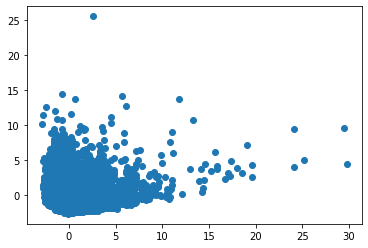

In [36]:
plt.scatter(xcords, ycords)
plt.show()

Find correlation matrix

In [37]:
X.corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.310140,0.176083,0.159985,0.122109,0.495586,-0.088459,0.063832,-0.069582,0.445307,0.382388,0.147887,0.535518,0.322830,0.398669,-0.333594,0.066987
BALANCE_FREQUENCY,0.310140,1.000000,0.122635,0.095254,0.114739,0.089036,0.228158,0.187467,0.184159,0.181132,0.133265,0.183095,0.087682,0.039169,0.132519,-0.156961,0.104714
PURCHASES,0.176083,0.122635,1.000000,0.916780,0.679259,-0.053760,0.393000,0.497384,0.316025,-0.124863,-0.070277,0.688732,0.358425,0.606782,0.093842,0.176447,0.084545
ONEOFF_PURCHASES,0.159985,0.095254,0.916780,1.000000,0.329650,-0.033244,0.265460,0.524514,0.128380,-0.086413,-0.048705,0.545313,0.320613,0.570850,0.048741,0.129890,0.063400
INSTALLMENTS_PURCHASES,0.122109,0.114739,0.679259,0.329650,1.000000,-0.066099,0.441193,0.211829,0.511130,-0.136455,-0.076716,0.626083,0.258057,0.385391,0.132156,0.178440,0.083346
CASH_ADVANCE,0.495586,0.089036,-0.053760,-0.033244,-0.066099,1.000000,-0.218566,-0.090111,-0.178873,0.629030,0.656911,-0.078449,0.304161,0.459342,0.140094,-0.158566,-0.073090
PURCHASES_FREQUENCY,-0.088459,0.228158,0.393000,0.265460,0.441193,-0.218566,1.000000,0.502123,0.862338,-0.316771,-0.208749,0.567168,0.121372,0.100715,0.002979,0.305393,0.052161
ONEOFF_PURCHASES_FREQUENCY,0.063832,0.187467,0.497384,0.524514,0.211829,-0.090111,0.502123,1.000000,0.143911,-0.118225,-0.073384,0.544364,0.295432,0.244346,-0.030357,0.154073,0.080437
PURCHASES_INSTALLMENTS_FREQUENCY,-0.069582,0.184159,0.316025,0.128380,0.511130,-0.178873,0.862338,0.143911,1.000000,-0.268924,-0.172811,0.529192,0.063421,0.083424,0.030036,0.249547,0.065779
CASH_ADVANCE_FREQUENCY,0.445307,0.181132,-0.124863,-0.086413,-0.136455,0.629030,-0.316771,-0.118225,-0.268924,1.000000,0.799593,-0.136913,0.132841,0.182340,0.098844,-0.260001,-0.140038


Now try tSNE

In [38]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(X)

In [39]:
xcords = X_embedded[:,0]
ycords = X_embedded[:,1]

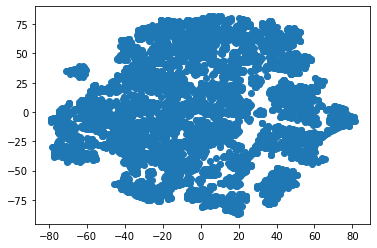

In [40]:
plt.scatter(xcords, ycords)
plt.show()

Implementation of KMeans with Cluster

In [41]:
class Cluster(object):

    def __init__(self, center):
        self.center = center
        self.data = []  # podaci koji pripadaju ovom klasteru

    def recalculate_center(self):
        # racunanje centra klastera
        if len(self.data) > 0:
            t = self.center
            self.center = np.average(self.data, axis=0)
            return np.linalg.norm(t - self.center)
        return 0
            
class KMeans(object):

    def __init__(self, n_clusters, max_iter):
        """
        :param n_clusters: broj grupa (klastera)
        :param max_iter: maksimalan broj iteracija algoritma
        :return: None
        """
        self.data = None
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.clusters = []

    def fit(self, data):
        self.data = data  # lista N-dimenzionalnih podataka
        # TODO 4: normalizovati podatke pre primene k-means

        data_dim = self.data.shape[1]

        # TODO 1: implementirati K-means algoritam za klasterizaciju podataka
        # kada algoritam zavrsi, u self.clusters treba da bude "n_clusters" klastera (tipa Cluster)

        # inicijalizacija nesumicnih centara
        for centar in range(self.n_clusters):
            # interval je empirijski naboden 1-10 (treba normalizaciju uraditi)
            cent = np.random.uniform(-1, 1, (1, data_dim))[0]
            self.clusters.append(Cluster(cent))
            
        for itr in range(self.max_iter):
            # ciscenje dodeljenih tacaka pred iteraciju
            for c in self.clusters:
                c.data = []

            # za svaki element proveravam kome pripada
            for row in self.data:
                cluster_index = self.predict(row)
                self.clusters[cluster_index].data.append(row)
            # pomeranje centara
            change = False
            for cluster in self.clusters:
                if cluster.recalculate_center() > 10**(-7):
                    change = True
            
            if change:
                break
        # TODO (domaci): prosiriti K-means da stane ako se u iteraciji centri klastera nisu pomerili

    def predict(self, row):
        # TODO 1: implementirati odredjivanje kom klasteru odredjeni podatak pripada
        # podatak pripada onom klasteru cijem je centru najblizi (po euklidskoj udaljenosti)
        # kao rezultat vratiti indeks klastera kojem pripada

        closest_index = 0
        for i in range(len(self.clusters)):
            if np.linalg.norm(row - self.clusters[closest_index].center) > np.linalg.norm(row - self.clusters[i].center):
                closest_index = i

        return closest_index

    def sum_squared_error(self):
        # TODO 3: implementirati izracunavanje sume kvadratne greske
        # SSE (sum of squared error)
        # unutar svakog klastera sumirati kvadrate rastojanja izmedju podataka i centra klastera

        # da li ukupno samo saberem?
        total = 0

        for clus in self.clusters:
            for point in clus.data:
                # kvadrat rastojanja
                total += np.linalg.norm(clus.center - point)**2

        return total

In [42]:
kmeans = KMeans(n_clusters=2, max_iter=50)
#X['CUST_ID'] = data['CUST_ID'] # preserve order? (last element)
prep_data = X.to_numpy()
prep_data.shape

(8636, 17)

In [43]:
kmeans.fit(prep_data)
kmeans.sum_squared_error()

136867.81776906527

Now try to find right number of Ks

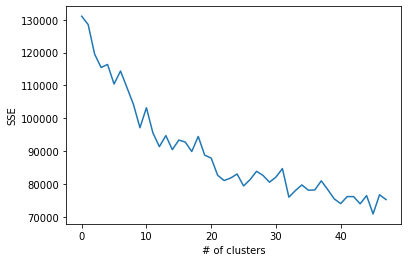

In [44]:
plt.figure()
sum_squared_errors = []
for n_clusters in range(2, 25):
    kmeans = KMeans(n_clusters=n_clusters, max_iter=200)
    kmeans.fit(prep_data)
    sse = kmeans.sum_squared_error()
    sum_squared_errors.append(sse)

plt.plot(sum_squared_errors)
plt.xlabel('# of clusters')
plt.ylabel('SSE')
plt.show()

Using optimal number from abov

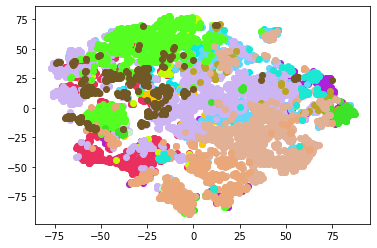

In [91]:
kmeans = KMeans(n_clusters=15, max_iter=100)
kmeans.fit(prep_data)
centers = [cluster.center for cluster in kmeans.clusters]

data_concat = []
cluster_number = 0
data_cluster_predictions = []

for c in kmeans.clusters:
    data_concat += c.data
    data_cluster_predictions += [cluster_number] * len(c.data)
    cluster_number += 1

DATA_embedded = TSNE(n_components=2,).fit_transform(data_concat)
# plot dot by dot
dex = 0
for c in kmeans.clusters:
    cluster_color = np.random.rand(3,)
    for i in range(len(c.data)):
        xcord = DATA_embedded[dex,0]
        ycord = DATA_embedded[dex,1]
        plt.scatter(xcord, ycord, c=[cluster_color])
        dex += 1
plt.show()

Recognize classes using Decision Trees

In [92]:
dataframe = pd.DataFrame.from_records(data_concat)
dataframe.columns = target_cols
dataframe = dataframe * frame_standard_deviation + frame_mean

#attributes = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'CASH_ADVANCE']

#dataframe = dataframe[attributes]

dataframe.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,6732.823064,1.000000,324.95,324.95,0.00,1189.533753,0.083333,0.083333,0.000000,0.166667,3.0,3.0,10500.0,1720.118876,2506.745366,0.000000,12.0
1,3517.101616,0.727273,547.28,0.00,547.28,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,14.0,11000.0,8735.607835,17862.558310,0.000000,12.0
2,5315.945594,1.000000,1525.44,469.80,1055.64,0.000000,1.000000,0.333333,1.000000,0.000000,0.0,20.0,8500.0,1430.341501,1318.714920,0.000000,12.0
3,3990.523579,1.000000,263.50,190.60,72.90,0.000000,0.666667,0.083333,0.583333,0.000000,0.0,8.0,6000.0,6876.836205,1001.607366,0.083333,12.0
4,5860.433624,1.000000,561.87,249.50,312.37,0.000000,0.833333,0.166667,0.750000,0.000000,0.0,14.0,6000.0,1990.044998,2161.428274,0.000000,12.0


In [93]:
msk = np.random.rand(len(dataframe)) < 0.8

train = dataframe[~msk]
train_y = np.array(data_cluster_predictions)[~msk]

In [94]:
test = dataframe[msk]
test_y = np.array(data_cluster_predictions)[msk]

In [95]:
from sklearn import tree
dtree = tree.DecisionTreeClassifier(max_depth=5)

clf = dtree.fit(train, train_y)

In [96]:
from sklearn.metrics import accuracy_score

predicted = clf.predict(test)
acc = accuracy_score(test_y, predicted)
acc

0.635477299185099

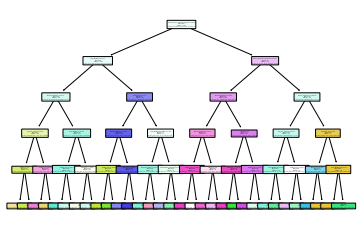

In [99]:
tree.plot_tree(clf, feature_names=target_cols, filled=True, rounded=True)
tree.export_graphviz(clf, feature_names=target_cols, out_file='output.dot', filled=True, rounded=True)
# display(graph)